In [128]:
%load_ext autoreload
%autoreload 2
from pymolint import base, struct_int
import numpy as np
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
sys.path.insert(1, '../seqplot/')

In [130]:
from seqplot.p9tools import 

In [2]:
base.find_contacts([(1,1,1),(2,2,2),(3,3,3)],[1,2,3],[(1.5,1.5,1.5),(2.5,2.5,2.5),(3.5,3.5,3.5)],[4,5,6])

[(1, 4, 0.8660254037844386),
 (2, 4, 0.8660254037844386),
 (3, 4, 2.598076211353316),
 (1, 5, 2.598076211353316),
 (2, 5, 0.8660254037844386),
 (3, 5, 0.8660254037844386),
 (2, 6, 2.598076211353316),
 (3, 6, 0.8660254037844386)]

In [3]:
import MDAnalysis as mda

In [94]:
import requests
import io
h=io.StringIO(requests.get('https://files.rcsb.org/download/1KX5.pdb').content.decode("utf-8") )


In [95]:
struct=mda.Universe(h,format='PDB')

In [84]:
import nglview as nv

In [96]:
nv.show_mdanalysis(struct.select_atoms('all'))

NGLWidget()

In [171]:
d=struct_int.struct2cont(struct,'segid B and protein')

In [172]:
df=d.get_df()
dp=d.get_num_int_profile()

In [173]:
from seqplot.pdb_plot import plot_prof4pdb

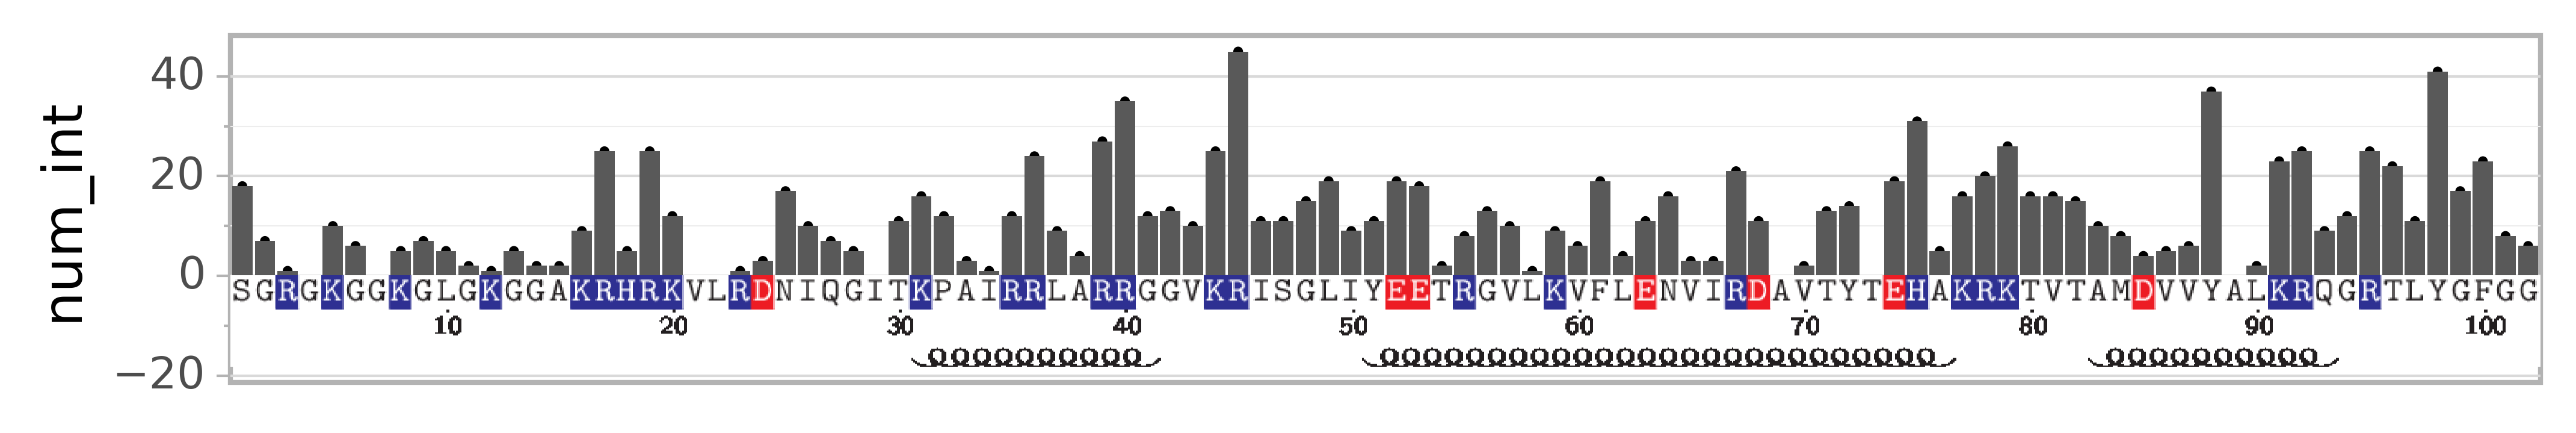

<ggplot: (8757847463688)>

In [177]:
plot_prof4pdb(pdbchid='1KX5_B',column='num_int',data=dp,ymin=0)

In [138]:
df.groupby(['A_atom_segid','A_atom_resid']).size().reset_index()

A_atom_segid  A_atom_resid   0
0              A             1  10
1              A             2   6
2              A             9   2
3              A            14   2
4              A            17   4
..           ...           ...  ..
100            A           131  20
101            A           132   3
102            A           133   9
103            A           134  14
104            A           135  16

[105 rows x 3 columns]

In [ ]:
cont_dict={}
for k in ['1AOI','1KX5','3LZ0']:
    struct_u=mda.Universe('structs/%s_nrf.pdb'%k)
    seln=struct_u.select_atoms('nucleic and segid I')
    selp=struct_u.select_atoms('protein and %s'%ngd[k]['hist_core'])
    pid2resid={a.id:a.resid for a in selp.atoms}
    pid2name={a.id:a.name for a in selp.atoms}
    pid2segid={a.id:a.segid for a in selp.atoms}
    nid2resid={a.id:a.resid for a in seln.atoms}
    nid2name={a.id:a.name for a in seln.atoms}
    nid2segid={a.id:a.segid for a in seln.atoms}
    cont=find_contacts(seln.positions,seln.ids,selp.positions,selp.ids)
    contdf=pd.DataFrame({'natom':[i[0] for i in cont],'patom':[i[1] for i in cont],'patom_name':[pid2name[i[1]] for i in cont],'patom_resid':[pid2resid[i[1]] for i in cont],'patom_segid':[pid2segid[i[1]] for i in cont],'natom_name':[nid2name[i[0]] for i in cont],'natom_resid':[nid2resid[i[0]] for i in cont],'natom_segid':[nid2segid[i[0]] for i in cont]})
    #Let's construct dataframe that has info about DNA atoms and their classification
    dna_at=pd.DataFrame()
    for i in range(-73,74):
        sel_bases=struct_u.select_atoms(ngd[k]['BP%d_DNA'%i]+' and (name N1 N2 N3 N4 N6 N7 N9 C2 C4 C5 C6 C7 C8 C4 O2 O6)')
        sel_sugar=struct_u.select_atoms(ngd[k]['BP%d_DNA'%i]+' and (name O4\' C1\' C2\' C3\' C4\' C5\')')
        sel_phosph=struct_u.select_atoms(ngd[k]['BP%d_DNA'%i]+' and (name O5\' O3\' P OP1 OP2 O1P O2P)')
        bids=list(sel_bases.ids)
        sids=list(sel_sugar.ids)
        pids=list(sel_phosph.ids)
        l=len(bids)+len(sids)+len(pids)
        df=pd.DataFrame({'id':(bids+sids+pids),'bp_num':[i]*l,'type':(['1base']*len(bids)+['2sugar']*len(sids)+['3phosph']*len(pids))})
        dna_at=dna_at.append(df,ignore_index = True)
#     print(dna_at)
    #Let's classify contacts according to dna_at
        cont_dict[k]=contdf.merge(dna_at,how='left',left_on='natom',right_on='id')


